# Importing the Libraries

In [ ]:
import numpy as np

# Pre-installing Required Functions

In [ ]:
color_generator = lambda n: list(
    map(lambda i: "#" + "%06X" % np.random.randint(0, 0xFFFFFF), range(n)))

In [4]:
import seaborn as sns

sns.color_palette("hls",10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

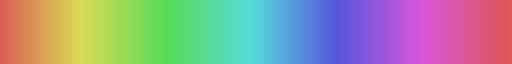

In [14]:
pal = sns.color_palette("hls", as_cmap=True)
print(pal)
sns.color_palette("hls", as_cmap=True)

In [22]:
pal = sns.color_palette("rocket")
print(pal)

[(0.20973515, 0.09747934, 0.24238489), (0.43860848, 0.12177004, 0.34119475), (0.67824099, 0.09192342, 0.3504148), (0.8833417, 0.19830556, 0.26014181), (0.95381595, 0.46373781, 0.31769923), (0.96516917, 0.70776351, 0.5606593)]


In [11]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

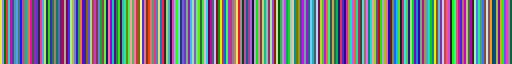

In [24]:
import matplotlib,numpy

cmap = matplotlib.colors.ListedColormap ( numpy.random.rand ( 256, 3))
cmap

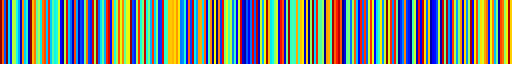

In [20]:
import numpy as np
import matplotlib.pyplot as plt
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))
cmap

In [26]:
sns.color_palette("Paired")


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [31]:
pal = sns.color_palette("Paired")
print(pal)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.2, 0.6274509803921569, 0.17254901960784313), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (1.0, 0.4980392156862745, 0.0), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]


In [36]:
import random
import colorsys

h,s,l = random.random(), 0.5 + random.random()/2.0, 0.4 + random.random()/5.0
r,g,b = [int(256*i) for i in colorsys.hls_to_rgb(h,l,s)]

print(h, s, l)

0.4078936428300264 0.7023984202261528 0.5302421846036786


In [37]:
import colorsys
import cv2
import numpy as np
import random
#generates random colors in semi rgb format


def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors
colors=random_colors(100)
for color in colors:
    r,g,b=color
    r=round(r*255)
    g=round(g*255)
    b=round(b*255)
    image = create_blank(width1, height1, rgb_color=(r,g,b))
cv2.imwrite('path/to/folder'+str(r)+str(g)+str(b)+'.jpg', image)

ModuleNotFoundError: No module named 'cv2'